# Machine Learning UAS
## 2440060383 - Kevin Bennett Haryono

To provide easeness in finding my answer for the UAS question, i marked a few text blocks with the question number in between brackets. For example:

"...Therefore, we should consider the other option. ***(1 a)***"

In case of this .ipynb fails, please refer to this google colab link https://colab.research.google.com/drive/1kyQlLNNGuojtbCR_ybSu8_EYS7exG2i2?usp=sharing

In [96]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [97]:
df = pd.read_csv('/Dataset/CustomerMarketingDataset.csv')
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Young,Male,Rent,Single,Close,15000,3,Low,6,Low
1,Young,Male,Rent,Single,Close,13000,3,Low,6,Low
2,Young,Female,Rent,Single,Close,14600,3,Low,6,Low
3,Young,Female,Rent,Single,Close,17900,3,Low,6,Low
4,Old,Female,Own,Single,Close,12700,2,Low,6,Low
...,...,...,...,...,...,...,...,...,...,...
995,Middle,Female,Own,Married,Far,99200,0,High,24,Very High
996,Old,Female,Own,Married,Far,110000,0,High,24,Very High
997,Middle,Female,Rent,Married,Far,120800,1,High,24,Very High
998,Middle,Male,Own,Married,Far,123000,1,High,24,Very High


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [99]:
df.describe()

,Salary,Children,Catalogs
count,1000.000000,1000.00000,1000.000000
mean,56103.900000,0.93400,14.682000
std,30616.314826,1.05107,6.622895
min,10100.000000,0.00000,6.000000
25%,29975.000000,0.00000,6.000000
50%,53700.000000,1.00000,12.000000
75%,77025.000000,2.00000,18.000000
max,168800.000000,3.00000,24.000000


This dataset consist of 10 columns, some columns can be used for prediction, such as age group classification, salary prediction, etc. But the dataset is a perfect fit for customer segmentation (clustering problem), as requested in the question. Note that only the column `History` has missing values that we would want to fix later. ***(1 a)***

## EDA

We will explore the data thoroughly to get a sense of it.

### Univariate Analysis

#### Numerical Variables Distribution

Note that there are only 2 numerical variable present, which are `Salary` and `Children`. Meanwhile, `Catalogs` columns are categorical due to the less varying values and more to a discrete variables.

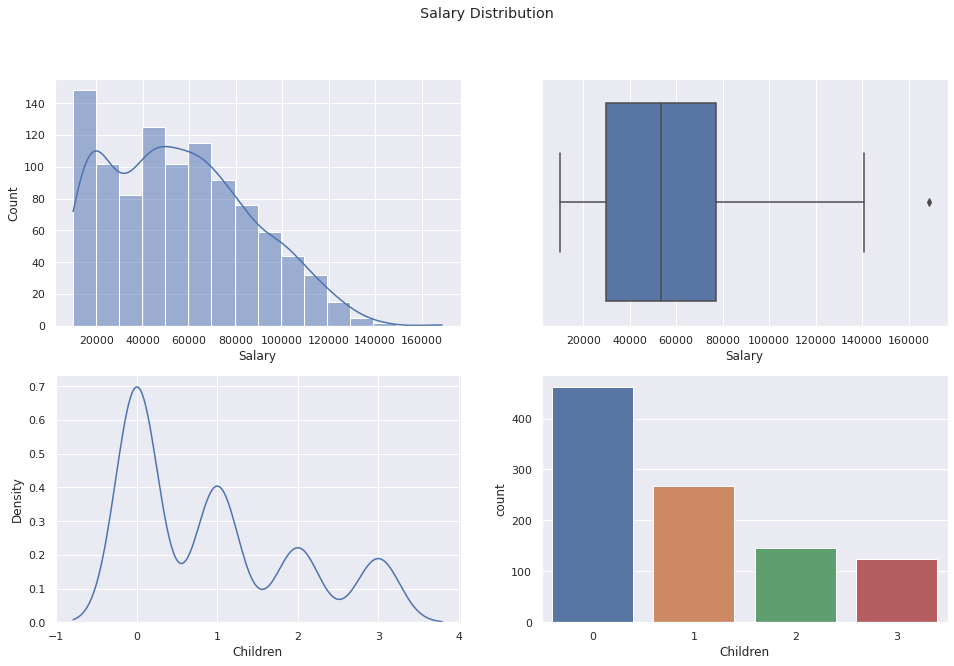

In [100]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

sns.histplot(data=df,
            x='Salary',
            ax=ax[0][0],
            bins=16,
            kde=True)

sns.boxplot(data=df,
            ax=ax[0][1],
            x='Salary')

sns.kdeplot(data=df,
             x='Children',
             ax=ax[1][0])

sns.countplot(data=df,
             x='Children',
             ax=ax[1][1])

fig.suptitle('Salary Distribution')
plt.show()

There is a few outliers present in the `Salary` column, it will be removed so that clustering/predictive model later on won't be biased. ***(1 a)***

#### Categorical Variables Unique Values

We will take a closer look at the values within the categorical columns, usually there are some garbage/NA values that is hidden (not represented in pandas nan).

In [101]:
cat_cols = [x for x in df.columns if df[x].dtype=='O']
cat_cols.append('Catalogs')
cat_cols

['Age',
 'Gender',
 'OwnHome',
 'Married',
 'Location',
 'History',
 'AmountSpent',
 'Catalogs']

In [102]:
for cat in cat_cols:
  print(cat + ": " + str(list(df[cat].unique())))

Age: ['Young', 'Old', 'Middle']
Gender: ['Male', 'Female']
OwnHome: ['Rent', 'Own']
Married: ['Single', 'Married']
Location: ['Close', 'Far']
History: ['Low', nan, 'Medium', 'High']
AmountSpent: ['Low', 'Medium', 'High', 'Very High']
Catalogs: [6, 12, 18, 24]


Looks like the values are all safe, nans are represented as it is, specifically in column `History` ***(1 a)***.

#### Categorical Variables Distribution

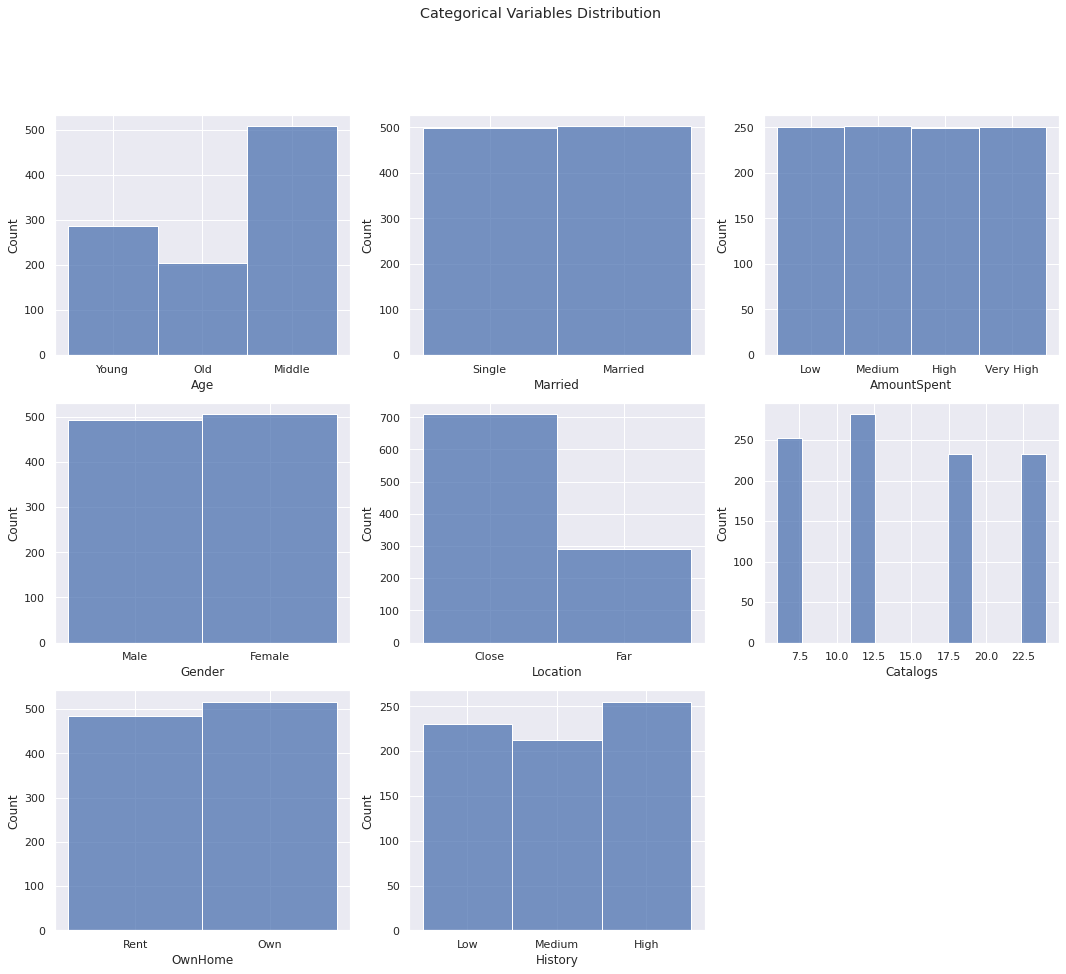

In [103]:
fig, ax = plt.subplots(3,3, figsize=(18,15))

fig.delaxes(ax[2][2])

col=-1
for i,cat in enumerate(cat_cols):
  if i%3==0:
    col+=1
  
  sns.histplot(data=df,
               x=cat,
               ax=ax[i%3][col])
  
fig.suptitle('Categorical Variables Distribution')
plt.show()

Most of the categorical columns have evenly distributed classes. But, columns `Location` and `Age` have "Middle" and "Far" with the most counts respectively. This can make most models biased to that one major class only as information on the other minor classes are lackin in the dataset. ***(1 a)***

### Bivariate Analysis
This section will analyze a few relationships between variables as per requested in number ***(1 b)***. Here I used violin plot so that we can see thoroughly how distributed a variable when separated into each of the other variable.

#### Age and Salary

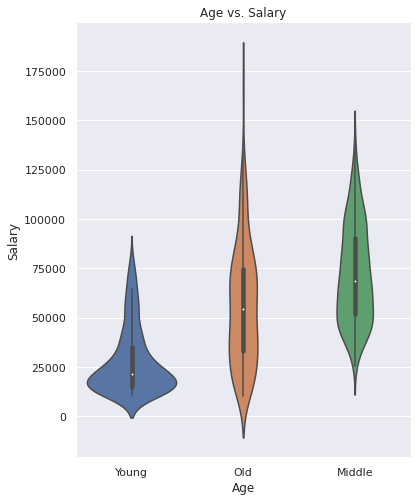

In [104]:
fig, ax = plt.subplots(figsize=(6,8))

sns.violinplot(data=df,
            x='Age',
            y='Salary')

ax.set_title('Age vs. Salary')
plt.show()

The distribution of salary per age is definitely logical as seen in the violin plot above. Young customers here might refer to people who are working entry-level jobs, part-timers, or internships, meaning lesser salary compared to Middle aged customers, who are more experienced and probably is in senior-level jobs. As for Old customers, they most likely live on pension/retirement funds (explains the distribution is in lower salary points), own a business or CEO-level jobs (explains the sharp point reaching over 175000 in salary).

#### Marital Status and Salary

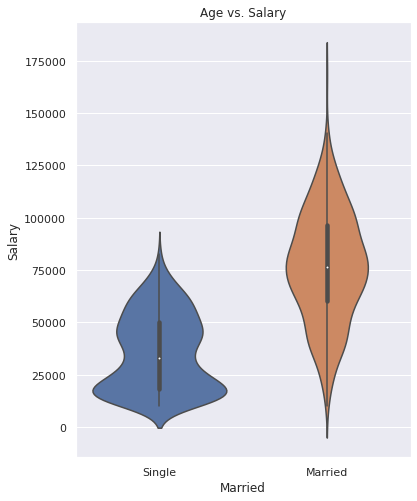

In [105]:
fig, ax = plt.subplots(figsize=(6,8))

sns.violinplot(data=df,
            x='Married',
            y='Salary')

ax.set_title('Age vs. Salary')
plt.show()

This relationship is a bit unique, because initially I thought that married customers might have lesser "personal" salary as they have to fund their family. But the plot shows otherwise, single customers have lesser salary, this might be because either the salary data accounts for both married couple salaries, or might be because of married customers are more financially stable compared to single customers (which makes sense in most cases of marriage).

#### Salary and AmountSpent

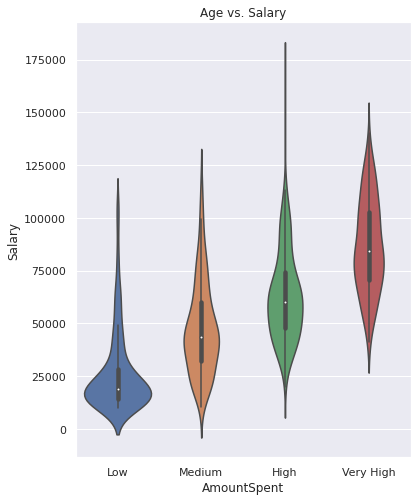

In [106]:
fig, ax = plt.subplots(figsize=(6,8))

sns.violinplot(data=df,
            x='AmountSpent',
            y='Salary')

ax.set_title('Age vs. Salary')
plt.show()

The relationship between `Salary` and `AmountSpent` is pretty much self-explanatory and logical too. People would consider a lot when buying items when they have lesser income, therefore explains the dense area in lower salary having more customers categorized in "Low" amount spent. And the salary progressively increases per category too. Customers having a higher income potentially resulted in them spending more to buy things in the department store.

### Data Preparation

#### Preprocessing ***(1 c)***

##### Imputing Missing Values
Firstly, let's not remove the NA values that we found out at the beginning, `History` column contains customer's purchase volume history data. We can assume that the null values are customer who has no volume history. By imputing with values that makes sense, we can preserve more information from the dataset instead of removing it.

In [107]:
df_prep = df.fillna('None')

In [108]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      1000 non-null   object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


We have successfully filled the `History` columns with the string 'None'

##### Scale Numerical Columns
Next is scaling numerical columns, which `Salary` is the only available column. Scaling numerical values helps in model training so that it is not biased, faster, and also potentially avoid vanishing gradient problem in some specific cases.

Here I picked StandardScaler, since it is commonly used for scaling numerical values. StandardScaler practically removes mean and scales the value to follow the data variance.

In [109]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

salary = np.array(df_prep['Salary']).reshape(-1,1) # Standard Scaler requests for 2D input
df_prep['Salary'] = sc.fit_transform(salary)

In [110]:
df_prep

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Young,Male,Rent,Single,Close,-1.343221,3,Low,6,Low
1,Young,Male,Rent,Single,Close,-1.408578,3,Low,6,Low
2,Young,Female,Rent,Single,Close,-1.356292,3,Low,6,Low
3,Young,Female,Rent,Single,Close,-1.248453,3,Low,6,Low
4,Old,Female,Own,Single,Close,-1.418382,2,Low,6,Low
...,...,...,...,...,...,...,...,...,...,...
995,Middle,Female,Own,Married,Far,1.408323,0,High,24,Very High
996,Old,Female,Own,Married,Far,1.761253,0,High,24,Very High
997,Middle,Female,Rent,Married,Far,2.114182,1,High,24,Very High
998,Middle,Male,Own,Married,Far,2.186075,1,High,24,Very High


##### Removing Outliers

Outliers can influence model's performance fatally. Since we found out that there were outliers present. We will be removing it here by utilizing [z-score outlier removal](https://www.codegrepper.com/code-examples/python/z+score+python+remove+outliers). We'll use z=score boundary of 3 since the outlier displayed in the boxplot of standardized `Salary` is above 3.

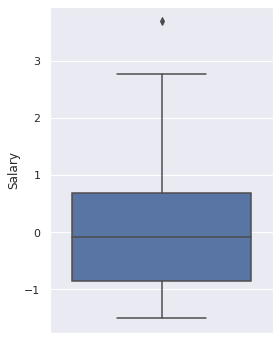

In [111]:
fig, ax = plt.subplots(figsize=(4,6))

sns.boxplot(data=df_prep,
            y='Salary')

plt.show()

In [112]:
from scipy import stats
df_prep = df_prep[(np.abs(stats.zscore(df_prep['Salary'])) < 3)].reset_index(drop=True)

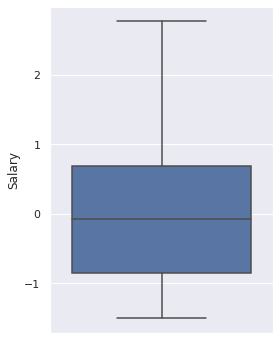

In [113]:
fig, ax = plt.subplots(figsize=(4,6))

sns.boxplot(data=df_prep,
            y='Salary')

plt.show()

#### Feature Engineering ***(1 c)***
After preprocessing, we have a clean and standardized dataset of exactly 999 customer data that we can **almost** use for training our model. However, note that models (generally, computers) can only train on numerical values. Therefore, we need to transform the existing categorical values into numerical values.



##### Encoding Categorical Variables

Firstly, after analyzing the categorical data previously, we can notice that the types of categorical data present are either binary (e.g. `Gender`)  or ordinal (e.g. `Amount Spent`). Therefore, I decided to use `LabelEncoder` and `OrdinalEncoder` from scikit-learn library for encoding these columns.

For the categorical columns `Children` and `Catalogs` can be ignored since they are already in numerical form.

In [114]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

binary = ['Married', 'Gender', 'Location', 'OwnHome']
ordinal = ['Age', 'AmountSpent', 'History']

encoded_vals = dict()

In [115]:
for cat in binary:
  le = LabelEncoder()
  
  df_prep[cat] = le.fit_transform(df_prep[cat])
  encoded_vals[cat] = le.classes_

In [116]:
for cat in ordinal:
  ord = OrdinalEncoder()

  cat_vals = np.array(df_prep[cat])
  cat_vals = cat_vals.reshape(-1,1)

  df_prep[cat] = ord.fit_transform(cat_vals)
  encoded_vals[cat] = ord.categories_[0]

In [117]:
df_prep

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,2.0,1,1,1,0,-1.343221,3,1.0,6,1.0
1,2.0,1,1,1,0,-1.408578,3,1.0,6,1.0
2,2.0,0,1,1,0,-1.356292,3,1.0,6,1.0
3,2.0,0,1,1,0,-1.248453,3,1.0,6,1.0
4,1.0,0,0,1,0,-1.418382,2,1.0,6,1.0
...,...,...,...,...,...,...,...,...,...,...
994,0.0,0,0,0,1,1.408323,0,0.0,24,3.0
995,1.0,0,0,0,1,1.761253,0,0.0,24,3.0
996,0.0,0,1,0,1,2.114182,1,0.0,24,3.0
997,0.0,1,0,0,1,2.186075,1,0.0,24,3.0


In [118]:
encoded_vals

{'Age': array(['Middle', 'Old', 'Young'], dtype=object),
 'AmountSpent': array(['High', 'Low', 'Medium', 'Very High'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'History': array(['High', 'Low', 'Medium', 'None'], dtype=object),
 'Location': array(['Close', 'Far'], dtype=object),
 'Married': array(['Married', 'Single'], dtype=object),
 'OwnHome': array(['Own', 'Rent'], dtype=object)}

#### Feature Selection ***(1 d)***
We'll move on to feature selection process. The feature selection process will be focused on to prepare the dataset for no 2a which is a classification task of `Amount Spent`. To perform feature selection, we will look at the correlation of each features to the target variables first. Below is the heatmap of the correlation

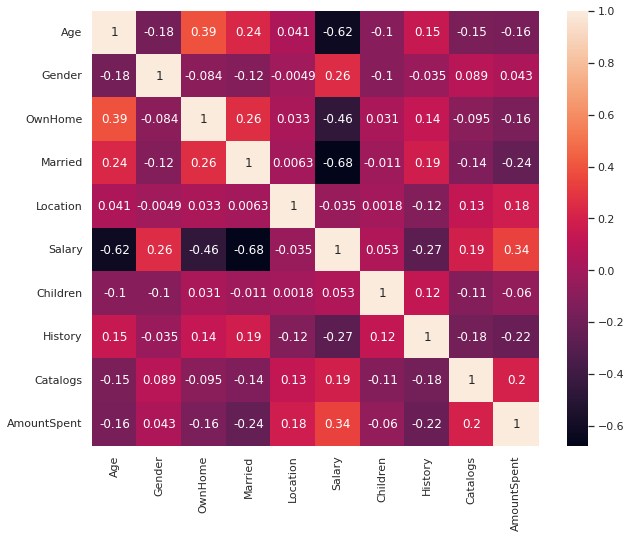

In [119]:
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(df_prep.corr(), annot=True)

Let's take a closer look at the correlation of each feature and `AmountSpent` target variable.

In [120]:
corr = df_prep.corr()['AmountSpent']

corr.abs().sort_values()[:-1]

Gender      0.042624
Children    0.059955
OwnHome     0.157297
Age         0.163602
Location    0.177710
Catalogs    0.204362
History     0.223584
Married     0.239780
Salary      0.341737
Name: AmountSpent, dtype: float64

Looking at the pearson correlation ordered from lowest to highest above, I think i will be selecting correlation with value greater than 0.1, so that not much information is loss. Therefore, columns `Gender` and `Children` will be dropped. 

## Modelling

### Classifying Customer Amount Spent ***(2)***
We'll move on to training our models for Customer's Amount Spent Classification task. First we'll split the dataset into train set and test set. Here, I set it so that the split will equally split `Location` column, since as we analyzed before that this column is the most imbalanced one. By equally splitting the contents to train set and test set respectively, the model can learn sufficient amount of information.

In [121]:
from sklearn.model_selection import train_test_split

rand = 0

X = df_prep.iloc[:, :-1]
y = df_prep.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1,
                                                    stratify=X['Location'],
                                                    random_state=rand)

#### Initial Training ***(2 a)***

Next, below I made a function that we can reuse so that the codes won't be repetitive. I chose the accuracy metric to measure general accuracy of the model. But, to analyze the model's performance deeper, we can utilize `classification_report` and have a look at each class' predictive capability of the model (Necessary since we know that the data is imbalanced)

In [122]:
from sklearn.metrics import accuracy_score, classification_report

# function to train, predict, and evaluate
def train_eval(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)

  preds = model.predict(X_test)

  print(accuracy_score(y_test, preds))
  print(classification_report(y_test, preds, target_names=encoded_vals['AmountSpent']))

##### Multiclass Logistic Regression
Though logistic regression is suited for binary classification, it is also possible to be used for multiclass classification, like the problem asked from the question. I picked logistic regression because this model is generally good and sometimes can be the best model option available if tuned well (based on experience).

[Multiclass classification](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/) using logistic regression itself has 2 distinct techniques:
- One vs. One (OvO) where we train a model for each pair of class from the list of classes available. This approach takes more time with the more classes present since it compares each pair of classes
- One vs. Rest (OvR) where we train a model for each distinct classes from the list of classes available. Practically, this approach will have models that can classify a single class respectively from the rest. More preferrable in my opinion due to shorter training time and logically makes sense.

Luckily, scikit-learn's [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model is automatically set to one-vs-rest method. Therefore, we can just instantiate the model to a variable.

In [123]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=rand)

train_eval(lr, X_train, X_test, y_train, y_test)

0.72
              precision    recall  f1-score   support

        High       0.65      0.61      0.63        28
         Low       0.81      0.96      0.88        26
      Medium       0.56      0.45      0.50        22
   Very High       0.80      0.83      0.82        24

    accuracy                           0.72       100
   macro avg       0.70      0.71      0.71       100
weighted avg       0.71      0.72      0.71       100



##### KNN
KNN or K-Nearest Neighbors is a very common model used in classification problems. It's hard not to include this for comparison task. The idea of this model is practically select `K` nearest "data points" or "information points" and similarize the point to the most common class of the selected `K` points.

By default, scikit-learn's K-Nearest Neighbors model is set so that K=5. I think it is the right number, therefore, we can also directly instantiate the model to a variable here.

In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

train_eval(knn, X_train, X_test, y_train, y_test)

0.71
              precision    recall  f1-score   support

        High       0.59      0.46      0.52        28
         Low       0.86      0.96      0.91        26
      Medium       0.55      0.55      0.55        22
   Very High       0.78      0.88      0.82        24

    accuracy                           0.71       100
   macro avg       0.69      0.71      0.70       100
weighted avg       0.70      0.71      0.70       100



##### Random Forest
Random Forest is one of the popular machine learning ensemble method where multiple decision trees is being trained all at once and either a popular vote (classification problems) or an average (regression problems) is taken from each decision trees. I have used this model several times and the results frequently stands out as the best model. Other than that, with the multiple individual component-like model (decision trees), it can reduce prediction errors a lot.

By default, scikit-learn's Random Forest Classifier model is set so that it trains 100 decision trees and aggregate popular vote. It is less estimators than what I use to set, but to make it easier we can just instantiate the model like previous ones.

In [125]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=rand)

train_eval(rf, X_train, X_test, y_train, y_test)

0.73
              precision    recall  f1-score   support

        High       0.64      0.50      0.56        28
         Low       0.86      0.96      0.91        26
      Medium       0.57      0.55      0.56        22
   Very High       0.79      0.92      0.85        24

    accuracy                           0.73       100
   macro avg       0.71      0.73      0.72       100
weighted avg       0.72      0.73      0.72       100



#### Results ***(2 a)***
We can see that, from the initial training process, the order of the best to worse model in terms of accuracy is:
1. Random Forest - 73%
2. Logistic Regression - 72%
3. K-Nearest Neighbors - 71%

However, notice the other metrics present in the classification report. For example, KNN has higher precision towards "Low" class compared to Logistic Regression despite the higher accuracy on the latter, this means that KNN are more robust in determining "Low" class compared to Logistic Regression.

Another example is Logistic Regression's recall towards "High" class compared to the top model, Random Forest. This indicates that the Random Forest model is worse in grouping the "High" class, as some are classified into other class group.

Note:
- **Precision** measures the  relevance of the retrieved classes predicted by the model (true positive in a group of predicted positives)
- **Recall** measures the retrieved items that were relevant as predicted by the model (true positives among all other "falsely classified" positives)

Source - [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)

#### Hyperparameter Tuning ***(2 b)***
Here, I will use [Grid Search](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/) technique for the hyperparameter tuning. Grid Search is practically an exhaustive process of trial and error trying to find the best set of parameters for a model. The exhaustive process itself basically just looping through a pre-defined list of parameters that we want to try, set the model, train it, evaluate, and store the model score. Afterwards, select the best parameter settings from the stored scores.

Since the dataset is imbalanced, we previously split the dataset stratified based on the column that is imbalanced to avoid uneven information spread. In scikit-learn's `GridSearchCV` class, we can't do that. However, we can feed another splitter called the `StratifiedKFold` for splitting the dataset. So firstly, let's instantiate that object.

In [126]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

skf.get_n_splits(X, y)

10

Next, we'll make the function so that we can reduce repetitive codes

In [127]:
def grid_search(model, params, X, y, metric):
  gs = GridSearchCV(model, 
                    param_grid=params, 
                    scoring=metric, 
                    n_jobs=-1,
                    cv=skf,
                    verbose=3)
  
  gs.fit(X,y)

  print("Best Score: ", gs.best_score_)
  print("Best Params: ", gs.best_params_)

##### Tuning Logistic Regression Model
Referencing from the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), I think below are the parameters that I want to tune for the logistic regression model. Though its a little bit hard to understand what each parameter do, but essentially here, I want to tune the model by trying different solvers, and different number of iterations for it to converge into a good model. `C` here is the regularization strength, which I think is also worth to be considered.

In [128]:
lr_tuned = LogisticRegression()

param_grid = {
  'max_iter': [n for n in range(100,501,100)],
  'solver': ['newton-cg','lbfgs','sag','saga'],
  'random_state': [0],
  'C': [0.1, 0.5, 1.0, 2.0]
}

grid_search(lr_tuned , param_grid, X, y, 'accuracy')

Fitting 10 folds for each of 80 candidates, totalling 800 fits
Best Score:  0.6876262626262626
Best Params:  {'C': 2.0, 'max_iter': 100, 'random_state': 0, 'solver': 'lbfgs'}


In [148]:
lr_tuned  = LogisticRegression(max_iter=100,
                        C=2.0,
                        solver='lbfgs',
                        random_state=rand)

print("Before: ")
train_eval(lr, X_train, X_test, y_train, y_test)
print("\nAfter: ")
train_eval(lr_tuned , X_train, X_test, y_train, y_test)

Before: 
0.72
              precision    recall  f1-score   support

        High       0.65      0.61      0.63        28
         Low       0.81      0.96      0.88        26
      Medium       0.56      0.45      0.50        22
   Very High       0.80      0.83      0.82        24

    accuracy                           0.72       100
   macro avg       0.70      0.71      0.71       100
weighted avg       0.71      0.72      0.71       100


After: 
0.68
              precision    recall  f1-score   support

        High       0.59      0.46      0.52        28
         Low       0.81      0.96      0.88        26
      Medium       0.50      0.45      0.48        22
   Very High       0.74      0.83      0.78        24

    accuracy                           0.68       100
   macro avg       0.66      0.68      0.66       100
weighted avg       0.66      0.68      0.67       100



##### Tuning KNN Model
Looking at the nature of KNN algorithm, which highly reliant on the number of neihbors to be considered and the distance between the neighbors and the points. I think that the following is the parameters that is worth to try and tune on. 

Referencing from the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), I decided to add the `p` parameter for consideration, since this parameter determine what type of distance to use, manhattan distance (how far by vertical and horizontal distance added) or euclidean distance (absolute distance).

In [130]:
knn_tuned = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [n for n in range(2,11)],
    'weights': ['uniform','distance'],
    'p': [1,2]
}

grid_search(knn_tuned, param_grid, X, y, 'accuracy')

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Score:  0.6926666666666667
Best Params:  {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [131]:
knn_tuned = KNeighborsClassifier(n_neighbors=5,
                           p=2,
                           weights='distance')
print("Before: ")
train_eval(knn, X_train, X_test, y_train, y_test)
print("\nAfter: ")
train_eval(knn_tuned, X_train, X_test, y_train, y_test)

Before: 
0.71
              precision    recall  f1-score   support

        High       0.59      0.46      0.52        28
         Low       0.86      0.96      0.91        26
      Medium       0.55      0.55      0.55        22
   Very High       0.78      0.88      0.82        24

    accuracy                           0.71       100
   macro avg       0.69      0.71      0.70       100
weighted avg       0.70      0.71      0.70       100


After: 
0.7
              precision    recall  f1-score   support

        High       0.57      0.43      0.49        28
         Low       0.89      0.92      0.91        26
      Medium       0.54      0.64      0.58        22
   Very High       0.77      0.83      0.80        24

    accuracy                           0.70       100
   macro avg       0.69      0.71      0.69       100
weighted avg       0.69      0.70      0.69       100



##### Tuning Random Forest
The random forest model is a bit more complicated due to multiple hyperparameters present as per given in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). I perform the tuning process by modifying the parameter grid from a work done by Will Koehrsen through his [Medium article](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74).

The number of decision trees is definitely a parameter that must be tuned. The other parameters that are included basically influences the algorithm such as `criterion` defines what function to measure the split quality, or `max_depth` defines the maximum tree depth to be built. I think doing the tuning on the algorithmic side of this model is also worth to try and have a look at on the accuracy later on.

In [132]:
rf_tuned = RandomForestClassifier()

param_grid = {
    'n_estimators': [n for n in range(100,1001,100)],
    'max_depth': [n for n in range(10,51,10)] + [None],
    'criterion': ['gini','entropy'],
    'min_samples_split': [2,5,10],
    'random_state': [0]
}

grid_search(rf_tuned, param_grid, X, y, 'accuracy')

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
Best Score:  0.7567070707070708
Best Params:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 800, 'random_state': 0}


In [149]:
rf_tuned = RandomForestClassifier(n_estimators=800,
                            criterion='gini',
                            max_depth=10,
                            min_samples_split=5,
                            random_state=0)

print("Before: ")
train_eval(rf, X_train, X_test, y_train, y_test)
print("\nAfter: ")
train_eval(rf_tuned, X_train, X_test, y_train, y_test)

Before: 
0.73
              precision    recall  f1-score   support

        High       0.64      0.50      0.56        28
         Low       0.86      0.96      0.91        26
      Medium       0.57      0.55      0.56        22
   Very High       0.79      0.92      0.85        24

    accuracy                           0.73       100
   macro avg       0.71      0.73      0.72       100
weighted avg       0.72      0.73      0.72       100


After: 
0.73
              precision    recall  f1-score   support

        High       0.64      0.50      0.56        28
         Low       0.86      0.96      0.91        26
      Medium       0.60      0.55      0.57        22
   Very High       0.76      0.92      0.83        24

    accuracy                           0.73       100
   macro avg       0.71      0.73      0.72       100
weighted avg       0.72      0.73      0.72       100



#### Tuned Model Evaluation ***(2 c)***
After doing the hyperparameter tuning process using Grid Search, out of 3 models that were trained, only Random Forest model improved in accuracy, the other 2 decreased. This can potentially caused by the dataset being imbalanced and the predictability of the model is reduced. However, if we take a look into the other metrics as printed in the classification report (Precision & Recall), there is a slight improvement for some target classes. This means that the model isn't exactly becoming worse, but the model essentially performed a tradeoff to "pay more attention" towards the classes with poor predictive performance with the classes that has high predictive performance (Which is common when we want to improve model's performance on imbalanced dataset, for example take a look at the random forest model f1 score decrease on `Very High` class).

I think there are a few things that could be executed to improve the model's performance on this imbalanced dataset, which includes:
- **Perform additional feature selection process**. Here, I only select features based on the Pearson correlation of each feature available towards the target variable. There are other [feature selection methods](https://machinelearningmastery.com/feature-selection-with-categorical-data/) which includes considering the chi-squared statistic and mutual information statistic.
- **Be Extra in Feature Engineering**. Here, I only performed simple data preprocessing and feature engineering steps like encoding and normalizing. I have seen a lot of people who performed more complex feature engineering process, which mostly adding more features from the available datasets, a simple example of that is adding cluster category. I did not follow their steps since I don't really understand why they did that and I am afraid that it might add more noise to the dataset. But it is something worth to explore and try.
- **Splitting the dataset more effectively**. I think the most visible problem here is the imbalanced dataset given, especially that the dataset has features (e.g. `Location` and `Age`) that are imbalanced, which means if we split the data in a random fashion, there is a possibility that the testing set contains more predictive features that were not explored by the model during training. The classes from scikit-learn that I used here were good but still limited. Due to this, the accuracy results from initial training and during hyperparameter tuning might also be influenced. Some considerations to be taken would be manually splitting the dataset for training, and also creating a function which can be used during tuning.
- **Handle the imbalanced dataset**. Imbalanced dataset can be handled by [several methods](https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/), which includes undersampling/oversampling and weighted classification.
- **Collect more data**. This is outside the scope of the given dataset, making it not relevant for this case. But in a real world problem, oftentimes having more data would be better.

### Customer Segmentation ***(3)***
This number is a customer segmentation problem because the store intends to separate the customer population into several groups and handle them differently.

#### Data Prep for Clustering ***(3 a)***
Some things that needs to be considered for training clustering models are:
- Can be very biased to noise, meaning we need to remove outliers
- Large data values can also influence the model. Standardizing is a good idea to avoid that.
- Number of clusters need to be relevant enough to separate the data evenly.

The data that I have prepared has already went outliers removal and standardization step, therefore we can directly use the prepped data previously for training the cluster model.

#### Training + Tuning ***(3 b)***


In [134]:
X = df_prep

##### K-Means
K-Means Clustering is a very popular clustering algorithm, that's why I decided to pick this model to handle the customer segmentation problem. When using K-Means, I think the only important hyperparameter to consider is the number of clusters. Therefore, we will exactly pay attention to that parameter and also perform tuning process.

The method for tuning this model that I use is the elbow method, where we find the critical point between number of clusters and inertia produced by the model which starts to decrease/slope(melandai) slowly. This elbow method can be directly used as an evaluation observation to compare which number of clusters is the best for the algorithm.

In [135]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# inertia/wcss is basically the sum of squared distance between every data points to its nearest cluster point
cluster = [n for n in range(2,11)]
wcss = []
scores = []

for i in cluster:
  km = KMeans(n_clusters=i, random_state=rand)
  
  km.fit(X)

  pred = km.predict(X)
  wcss.append(km.inertia_)
  scores.append(silhouette_score(X, pred))

Notice in the cell above, I also included silhouette score, this is done to add an extra evaluation insight towards the number of clusters suitable for K-Means Clustering model. 

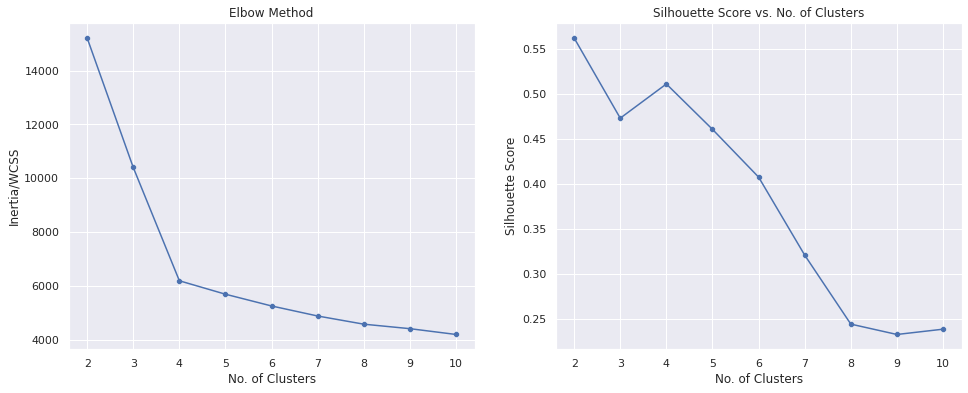

[0.5626009014816464, 0.47324811754139684, 0.5113472489564898, 0.46080111118010453]


In [136]:
fig, ax = plt.subplots(ncols=2, figsize=(16,6))

sns.scatterplot(x=cluster, y=wcss, ax=ax[0])
sns.lineplot(x=cluster, y=wcss, ax=ax[0])

ax[0].set_ylabel('Inertia/WCSS')
ax[0].set_xlabel('No. of Clusters')

ax[0].set_title('Elbow Method')

sns.scatterplot(x=cluster, y=scores, ax=ax[1])
sns.lineplot(x=cluster, y=scores, ax=ax[1])

ax[1].set_ylabel('Silhouette Score')
ax[1].set_xlabel('No. of Clusters')

ax[1].set_title('Silhouette Score vs. No. of Clusters')
plt.show()

print(scores[:4])

As we can see from both plots above, it can be seen that the optimal number of clusters would be 4 clusters for segmenting the customers. Though 5 can also be a good cluster, but the silhouette score is smaller compared to 4 (if the silhouette score is near to one, it is better).

The elbow method shows us the clustering capability of the model based on the distance of each data points to respective cluster centroids. While silhouette score shows us the clustering capability of the model based on the similarities of each data points in the same cluster.

Next we will take a better look on evaluating the K-Means Clustering Algorithm using Silhouette Analysis. I reference this evaluation method from [towardsdatascience article](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a) by Imad Dabbura and [scikit-learn article](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). Silhouette analysis simply observe the individual points' silhouette scores and compare them with the average silhouette score of the whole clustered data points which I think is good for getting some insight on our model.

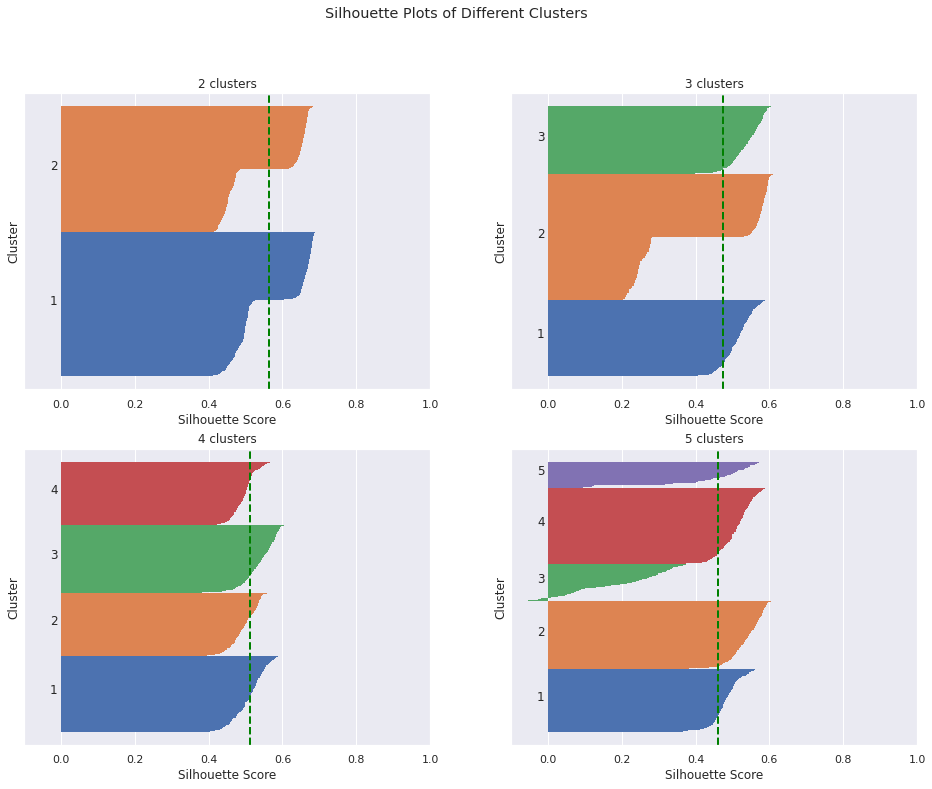

In [137]:
from sklearn.metrics import silhouette_samples

n_clusters = [2,3,4,5]

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(16,12))

row, col = 0, 0

for i in range(4):
  # KMeans
  km = KMeans(n_clusters=n_clusters[i], random_state=rand)
  preds = km.fit_predict(X)
  centroids = km.cluster_centers_

  # silhouette samples
  silhouette_vals = silhouette_samples(X, preds)

  # Silhouette plot
  y_ticks = []
  y_lower, y_upper = 0, 0
  for j, cluster in enumerate(np.unique(preds)):
      cluster_silhouette_vals = silhouette_vals[preds == cluster]
      cluster_silhouette_vals.sort()
      y_upper += len(cluster_silhouette_vals)
      ax[row][col].barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
      ax[row][col].text(-0.03, (y_lower + y_upper) / 2, str(j + 1))
      y_lower += len(cluster_silhouette_vals)

  avg_score = np.mean(silhouette_vals)
  ax[row][col].axvline(avg_score, linestyle='--', linewidth=2, color='green')
  ax[row][col].set_yticks([])
  ax[row][col].set_xlim([-0.1, 1])
  ax[row][col].set_xlabel('Silhouette Score')
  ax[row][col].set_ylabel('Cluster')
  ax[row][col].set_title(str(n_clusters[i])+' clusters')

  col+=1
  if(col%2 == 0):
    col=0
    row+=1

fig.suptitle('Silhouette Plots of Different Clusters')
plt.show()

The silhouette analysis suggests that the optimal number of clusters is 4 since most of the data points that are clustered achieve silhouette scores above the average(green dotten line). Though both 2 and 3 clusters also shows similar results, but a lot of it are not clustered properly, indicated by a lot of the bars fall below the average silhouette score. In 5 clusters, there 1 or 2 clusters that most of them fall below the average silhouette score, another indication of poor clustering performance.

##### DBSCAN
DBSCAN works a little differently from KMeans, we do not need to specify the number of clusters since the algorithm will automatically converge and produce a suitable amount of cluster based on the dataset given, which is why I picked this as the second clustering model to train.

The tuning process for DBSCAN will be similar to the K-Means, but here we will compare the eps (parameter that measures the maximum distance between two samples for one to be considered in the same neighborhood as the other, mentioned in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)) against the silhouette score of the model. This tuning was inspired from a [medium article](https://medium.com/@mohantysandip/a-step-by-step-approach-to-solve-dbscan-algorithms-by-tuning-its-hyper-parameters-93e693a91289) by Mohantysandip.

In [138]:
from sklearn.cluster import DBSCAN

dists = np.linspace(0.5,5,10)
scores = []

for i in dists:
  dbsc = DBSCAN(eps=i)

  pred = dbsc.fit_predict(X)

  scores.append(silhouette_score(X, pred))

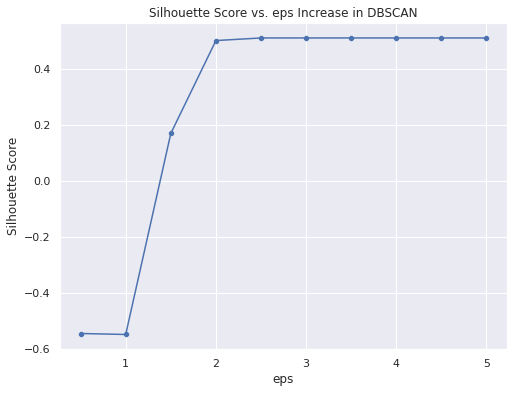

In [139]:
fig, ax = plt.subplots(figsize=(8,6))

sns.scatterplot(x=dists, y=scores)
sns.lineplot(x=dists, y=scores)

ax.set_xlabel('eps')
ax.set_ylabel('Silhouette Score')

ax.set_title('Silhouette Score vs. eps Increase in DBSCAN')
plt.show()

In [140]:
dbsc = DBSCAN(eps=2)

pred=(dbsc.fit_predict(X))

silhouette_score(X, pred)

0.5020873047205502

The best eps distance seems to be at `2` as per seen in the plot above which achieves a silhouette score of 0.552. Note that negative values of silhouette score means that the clustering fails to segment the data points in the right cluster.

Due to the nature of DBSCAN which groups points based on the density, we cannot identify the cluster points, therefore silhouette analysis cannot be performed on DBSCAN. But, we can see the number of possible clusters by looking at the core samples that DBSCAN algorithm picked.

In [147]:
set(dbsc.labels_)

{-1, 0, 1, 2, 3}

As we can see, there are possibly 4 clusters formed when using the DBSCAN algorithm (`-1` indicates outliers which are not considered). This number of clusters is similar to the ones produced when using KMeans. Not only that, the silhouette scores are also similar when we compare both, around 0.51.

#### Tuned Model Evaluation ***(3 c)***
Based on the evaluation that were performed on both models, we can see that the optimal number of clusters in this case is 4. The silhouette score itself is relatively on the middle scale, meaning there is a lot room for improvement, which I think of the following steps:
- **Dimensionality Reduction**. Our current prepared data are in high dimension due to the predictive features that we use for clustering. Clustering models suffer greatly from the curse of dimensionality. If we can perform dimensionality reduction (such as PCA), we might be able to get better clustering results and also visualize the cluster. We were not able to visualize the clusters due to the high dimensions (though possible by taking only 2 features and apply the cluster category to each points, but it might create visual bias).
- **Selecting more reasonable features**. Instead of clustering all of customer's characteristics, We can just focus on certain characteristic that is useful for the department store to gain insight on. For example, segmenting customers based on their purchasing ability (`Salary`, `AmountSpent`, `History`), customer backgrounds (`Age`, `Location`, `OwnHome`), or possibly their purchasing preferences (`Catalogs` but more specific data needed for this case, like what are the catalogs they buy).

Thinking fundamentally, in clustering, there are no clear metric for evaluating the model's performance as different environment (dataset) and parametric (model) settings will bring different results. Clustering really rely on the objective that we are trying to achieve in performing clustering, and from there, we can decide all kinds of determining features that are necessary for us to consider feeding to the clustering model. Afterwards, receiving cluster groups that is suitable for our initial goal.